# Importing  library

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset excel file using pandas.
df= pd.read_excel('Oldcars.xlsx')

In [3]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows : 10000
No. of Columns : 24


,Car Model,Make Year,Fuel Type,KMs driven,Engine Displacement(CC),Transmission,Milage(kmpl),Max Power(bhp),Torque(Nm),Seating Capacity,Color,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Tyre Volume,Engine Type,No of Cylinder,Turbo Charger,Super Charger,Length(mm),Width(mm),Height(mm),Price(Rs)
0,Volkswagen Jetta 1.6 Tdi,2010.0,Diesel,"90,000 Kms",1596,Manual,15.5,105,25.5,NaN,Blue,6 Speed,Power,-,-,NaN,In-Line Engine,4.0,Yes,NaN,"4,554",NaN,NaN,4.90 Lakh*
1,Honda City Vtec,2007.0,Petrol,"57,000 Kms",1493,Manual,16,106,13.5 kgm,NaN,Golden,5 Speed,Power,NaN,NaN,NaN,In-Line Engine,4.0,No,No,4270,NaN,1395,3.10 Lakh*
2,Audi A4 2.0 Tdi,2013.0,Diesel,"66,000 Kms",1968,Automatic,16.55,147.51,320,NaN,White,7 Speed,Power,Ventilated Disc,NaN,NaN,TDI Diesel Engine,4.0,Yes,No,4701,2040,1427,15.75 Lakh*
3,Tata Harrier Xz Dual Tone,2021.0,Diesel,"16,000 Kms",1956,Manual,16.35,167.67,350nm,NaN,Red,6-Speed,NaN,Disc,Drum,"Tubeless, Radial",NaN,NaN,NaN,-,NaN,1894,1706,21.50 Lakh*
4,Skoda Octavia Classic 1.9 Tdi Mt,2007.0,Diesel,"1,10,000 Kms",1896,Manual,18.7,66(90) / 4000,210 / 1900,5,Grey,5 Speed,NaN,Disc,Drum,"Tubeless,Radial",NaN,NaN,NaN,No,NaN,1731,1455,2.49 Lakh*


In [4]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['Make Year', 'No of Cylinder'], object: ['Car Model', 'Fuel Type', 'KMs driven', 'Engine Displacement(CC)', 'Transmission', 'Milage(kmpl)', 'Max Power(bhp)', 'Torque(Nm)', 'Seating Capacity', 'Color', 'Gear Box', 'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Volume', 'Engine Type', 'Turbo Charger', 'Super Charger', 'Length(mm)', 'Width(mm)', 'Height(mm)', 'Price(Rs)']}

This dataset contain 10000 rows and 24 columns.

We have lot feature here with object datatypes which actually have to be integer type.

Our target feature is Price.

### Feature engineering

###### 1. Transfoming datatypes of KMs driven into int type.

In [5]:
df['KMs driven'] = df['KMs driven'].map(lambda x : x.split(' ')[0])

In [6]:
df['KMs driven'] = df['KMs driven'].map(lambda x : x.replace('Kms',''))

In [7]:
df['KMs driven'] = df['KMs driven'].map(lambda x : x.replace(',',''))

In [8]:
df['KMs driven']=pd.to_numeric(df['KMs driven'])

In [9]:
df['KMs driven'].dtypes

dtype('int64')

###### 2. Transfoming datatypes of Engine Displacement(CC) into int type.

In [10]:
df['Engine Displacement(CC)'] = df['Engine Displacement(CC)'].astype(str)

In [11]:
df['Engine Displacement(CC)']= df['Engine Displacement(CC)'].map(lambda x : x.replace('cc',''))

In [12]:
df['Engine Displacement(CC)'] = pd.to_numeric(df['Engine Displacement(CC)'])

In [13]:
df['Engine Displacement(CC)'].dtypes

dtype('int64')

###### 3. Transfoming datatypes of 'Milage(kmpl)' into float type.

In [14]:
 df['Milage(kmpl)'] = df['Milage(kmpl)'].astype(str)

In [15]:
df['Milage(kmpl)'] = df['Milage(kmpl)'].map(lambda x : x.replace('km/kg',''))

In [16]:
df['Milage(kmpl)'] = df['Milage(kmpl)'].map(lambda x : x.replace('-',''))

In [17]:
df['Milage(kmpl)'] = df['Milage(kmpl)'].map(lambda x : x.replace('km/hr',''))

In [18]:
df['Milage(kmpl)'] = pd.to_numeric(df['Milage(kmpl)'])

In [19]:
df['Milage(kmpl)'].dtypes

dtype('float64')

###### 4. Transfoming datatypes of Max Power into float type.

In [20]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('-','')

In [21]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('null ','')

In [22]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace(' PS','')

In [23]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('118PS at 6,600 rpm','116.3')

In [24]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('66(90) / 4000','116.3')

In [25]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('104 PS','104')

In [26]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('165 [224] at 3800','104')

In [27]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('75 PS at 4000 rpm','104')

In [28]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('75 PS','104')

In [29]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('75  at 5400 rpm','104')

In [30]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('63 HP at 3200 rpm','104')

In [31]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('112 at 3800 rpm','107')

In [32]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('90 PS','90')

In [33]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('171 PS','171')

In [34]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('125ps','125')

In [35]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('60 PS','60')

In [36]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('90PS at 4000rpm','90')

In [37]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('105PS','105')

In [38]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('163.5 Bhp','163.5')

In [39]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('160 BHP','160')

In [40]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('35 Bhp','35')

In [41]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('83 PS','83')

In [42]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('93 PS','93')

In [43]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('61 PS','63')

In [44]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('75PS','75')

In [45]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('71 PS at 4500 rpm','75')

In [46]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('95  at 3600 rpm','85')

In [47]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('152 PS','52')

In [48]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('90(66)','90')

In [49]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('170PS','170')

In [50]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('65.3 PS','65.3')

In [51]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('85ps','85')

In [52]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('90ps','95')

In [53]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('110 PS at 4000 RPM','110')

In [54]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('70.40Bhp','70.4')

In [55]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('75 PS at 4000rpm','75')

In [56]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('70  at 5400 rpm','70')

In [57]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('80 PS at 5200 rpm','78.9')

In [58]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('100PS at 5,500rpm','100')

In [59]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('843750rpm','84')

In [60]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('120 (86.7kw)','120')

In [61]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('82 PS','82')

In [62]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('160 PS','160')

In [63]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('55 Bhp','55')

In [64]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('85 PS','85')

In [65]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('170hp','170')

In [66]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('132 PS','132')

In [67]:
df['Max Power(bhp)'] = df['Max Power(bhp)'].replace('38Ps','40')

In [68]:
df['Max Power(bhp)'] = pd.to_numeric(df['Max Power(bhp)'])

In [69]:
df['Max Power(bhp)'].dtypes

dtype('float64')

###### 5. Transfoming datatypes of Torque into float type.

In [70]:
df['Torque(Nm)'] = df['Torque(Nm)'].map(lambda x : x.split('@')[0])

In [71]:
df['Torque(Nm)'] = df['Torque(Nm)'].map(lambda x : x.rstrip('nm'))

In [72]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('-','')

In [73]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('13.5 kg','128')

In [74]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('210 / 1900','210')

In [75]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('146 at 4800 rp','146')

In [76]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('259.87NM','259')

In [77]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('11.4 kgm at 4,000 rp','110')

In [78]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('190  at 1750 rp','190')

In [79]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('4.8 kg','80')

In [80]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('110  at 3750 rp','110')

In [81]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('180  at 1440-1500rp','180')

In [82]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('260  at 1800-2200 rp','259')

In [83]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('254NM','254')

In [84]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('22.4 kgm at 1750-2750rp','200')

In [85]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('25 KGM','235')

In [86]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('13.1 kg','259')

In [87]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('135  at 2500 rp','135')

In [88]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('220 at 1400-2600 rp','220')

In [89]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('190  at 2000rp','190')

In [90]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('24 KGM at 1900-2750 RPM','200')

In [91]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('108  at 3000 rp','110')

In [92]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('151NM','151')

In [93]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('13.9 kgm at 4200 rp','110')

In [94]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('6.1 kg','80')

In [95]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('18.5 kg-','200')

In [96]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('219.66NM','219.66')

In [97]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('12.5 kg','110')

In [99]:
df['Torque(Nm)'] = df['Torque(Nm)'].replace('110 (11.2)','110')

In [100]:
df['Torque(Nm)'] = pd.to_numeric(df['Torque(Nm)'])

In [101]:
df['Torque(Nm)'].dtypes

dtype('float64')

###### 6. Transfoming datatypes of Seating capacity into float type.

In [102]:
df['Seating Capacity'] = df['Seating Capacity'].replace('-','')

In [103]:
df['Seating Capacity'] = pd.to_numeric(df['Seating Capacity'])

In [104]:
df['Seating Capacity'].dtypes

dtype('float64')

###### 8. Transfoming datatypes of Seating length into float type.

In [105]:
df['Length(mm)'] = df['Length(mm)'].str.replace(',','')

In [106]:
df['Length(mm)'] = df['Length(mm)'].str.replace('-','')

In [107]:
df['Length(mm)'] = pd.to_numeric(df['Length(mm)'])

In [108]:
df['Length(mm)'].dtypes

dtype('float64')

###### 9. Transfoming datatypes of Seating Width(mm) into float type.

In [109]:
df['Width(mm)'] = df['Width(mm)'].str.replace(',','')

In [110]:
df['Width(mm)'] = df['Width(mm)'].str.replace('-','')

In [111]:
df['Width(mm)'] = pd.to_numeric(df['Width(mm)'])

In [112]:
df['Width(mm)'].dtypes

dtype('float64')

###### 10. Transfoming datatypes of Seating Height(mm) into float type.

In [113]:
df['Height(mm)'] = df['Height(mm)'].str.replace(',','')

In [114]:
df['Height(mm)'] = df['Height(mm)'].str.replace('-','')

In [115]:
df['Height(mm)'] = pd.to_numeric(df['Height(mm)'])

In [116]:
df['Height(mm)'].dtypes

dtype('float64')

###### 11. Transfoming datatypes of Price(Rs) into float type.

In [117]:
df['Price(Rs)'] = df['Price(Rs)'].str.replace('Lakh*','100000')
df['Price(Rs)'] = df['Price(Rs)'].str.replace('Cr*','100000')
df['Price(Rs)'] = df['Price(Rs)'].str.replace(',','')

In [118]:
df['Price(Rs)'] = df['Price(Rs)'].str.replace('*','')

In [119]:
df['Price(Rs)'] = df['Price(Rs)'].str.replace('100000ore','100000')

In [120]:
df[['a','b']] = df['Price(Rs)'].str.split(expand=True)
df['a'] = df['a'].astype("float")
df['b'] = df['b'].astype("float")

In [121]:
df['b'] = df['b'].fillna(value = 1)
df["Price (Rs.)"] = df['a'] * df['b']

In [122]:
df.drop(columns=['Price(Rs)','a','b'], inplace = True)

###### 11. Feature Engineering on Make Year column to extract Age of Car

In [123]:
df['Car_Age'] = 2022 - df['Make Year'] 

In [124]:
df.drop(columns=['Make Year'], inplace = True)

###### 12.Feature Engineering on Car Model

In [125]:
df['Car_Brand'] = df["Car Model"].str.split(' ').str[:2]
df['Car_Brand'] = df['Car_Brand'].apply(lambda x: ','.join(map(str, x)))
df['Car_Brand'] = df['Car_Brand'].str.replace(',',' ')
df['Car_Model'] = df["Car Model"].str.split(' ').str[2:]
df['Car_Model'] = df['Car_Model'].apply(lambda x: ','.join(map(str, x)))
df['Car_Model'] = df['Car_Model'].str.replace(',',' ')

In [126]:
df.drop(columns = 'Car Model', inplace = True)

In [127]:
# As we have 24 columns lets sort columns by their datatype after conversion into appropriate datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['KMs driven', 'Engine Displacement(CC)'], float64: ['Milage(kmpl)', 'Max Power(bhp)', 'Torque(Nm)', 'Seating Capacity', 'No of Cylinder', 'Length(mm)', 'Width(mm)', 'Height(mm)', 'Price (Rs.)', 'Car_Age'], object: ['Fuel Type', 'Transmission', 'Color', 'Gear Box', 'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Volume', 'Engine Type', 'Turbo Charger', 'Super Charger', 'Car_Brand', 'Car_Model']}

# Data Integrity Check

In [128]:
# Spliting data in Numeric and categorical Variable.
Numerical = ['KMs driven', 'Engine Displacement(CC)', 'Car_Age','Milage(kmpl)', 'Max Power(bhp)', 'Torque(Nm)',
             'Seating Capacity', 'No of Cylinder', 'Length(mm)', 'Width(mm)', 'Height(mm)', 'Price (Rs.)' ]

Categorical = [ 'Fuel Type', 'Transmission', 'Color', 'Gear Box', 'Steering Type', 
               'Front Brake Type', 'Rear Brake Type', 'Tyre Volume', 'Engine Type', 'Turbo Charger', 
               'Super Charger', 'Car_Brand', 'Car_Model']

In [129]:
df.duplicated().sum() # This will detect duplicate entries in dataset

0

In [130]:
df.isin(['????','?????','-','null','NA',' ']).sum().any()

True

In [131]:
df.replace('-',np.nan, inplace = True)
df.replace('null',np.nan, inplace= True)
df.replace('????', np.nan, inplace = True)
df.replace('?????', np.nan, inplace = True)
df.replace(' ', np.nan, inplace = True)

In [132]:
df.to_excel('Clean data .xlsx',index =False)

In [190]:
df = pd.read_excel('clean data.xlsx')

In [191]:
df.isnull().sum()

Fuel Type                    26
KMs driven                    0
Engine Displacement(CC)       0
Transmission                  0
Milage(kmpl)                 27
Max Power(bhp)              121
Torque(Nm)                  145
Seating Capacity            487
Color                      1860
Gear Box                    128
Steering Type               453
Front Brake Type            483
Rear Brake Type             437
Tyre Volume                 350
Engine Type                 378
No of Cylinder              403
Turbo Charger               266
Super Charger               373
Length(mm)                  176
Width(mm)                   173
Height(mm)                  172
Price (Rs.)                   0
Car_Age                       0
Car_Brand                     0
Car_Model                  1660
dtype: int64

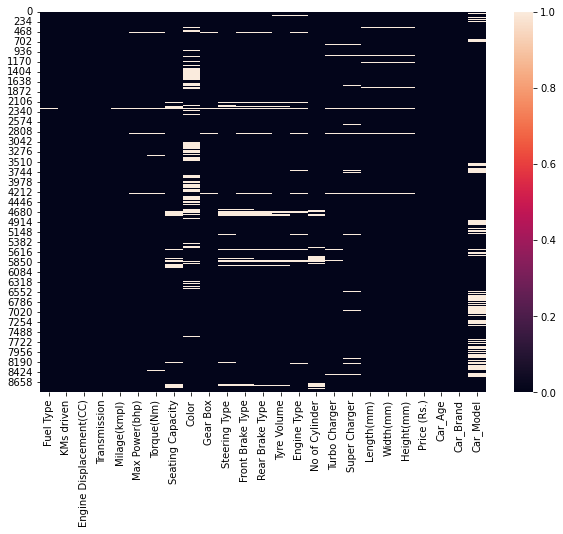

In [192]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull())
plt.show()

In [193]:
pd.set_option('display.max_rows',None)
for i in Categorical :
    print(i)
    print(df[i].value_counts())
    print('*'*50)

Fuel Type
Petrol      4767
Diesel      3981
CNG           67
LPG           41
Electric       4
Name: Fuel Type, dtype: int64
**************************************************
Transmission
Manual       7457
Automatic    1429
Name: Transmission, dtype: int64
**************************************************
Color
White                          1943
Other                          1199
Silver                         1052
Grey                            870
Red                             541
Blue                            336
Black                           272
Brown                           172
Maroon                           72
Golden                           69
Orange                           56
Green                            25
SILKY SILVER                     23
Gold                             22
Star Dust                        13
Others                           11
Purple                           11
Silky silver                      9
Yellow                            9
S

###### 1. Value counts and Sub-category Check For 'Super Charger'

In [194]:
df['Super Charger'].value_counts()

No     8497
Yes      12
NO        4
Name: Super Charger, dtype: int64

In [195]:
df['Super Charger'].replace('NO','No',inplace= True)

In [196]:
df['Super Charger'].value_counts()

No     8501
Yes      12
Name: Super Charger, dtype: int64

###### 2. Value counts and Sub-category Check For 'Turbo Charger'

In [197]:
df['Turbo Charger'].value_counts()

No      5034
Yes     3570
no         6
YES        5
Twin       3
yes        2
Name: Turbo Charger, dtype: int64

In [198]:
df['Turbo Charger'].replace('no','No', inplace= True)
df['Turbo Charger'].replace('YES','Yes', inplace= True)
df['Turbo Charger'].replace('yes','Yes', inplace= True)

In [199]:
df['Turbo Charger'].value_counts()

No      5040
Yes     3577
Twin       3
Name: Turbo Charger, dtype: int64

###### 3. Value counts and Sub-category Check For 'Front Brake Type'.

In [200]:
df['Front Brake Type'].value_counts()

Disc                                        4575
Ventilated Disc                             3288
Solid Disc                                   188
Ventilated Discs                              94
Disc & Caliper Type                           54
Ventilated DIsc                               49
Disk                                          37
Drum                                          22
Ventilated Disk                               20
Ventilated discs                              13
Disc, 236 mm                                  13
Vantilated Disc                               12
Ventlated Disc                                 9
Ventillated Disc                               5
Vacuum assisted hydraulic dual circuit w       4
Booster assisted ventilated disc               3
264mm Ventilated discs                         3
disc                                           3
Ventillated Discs                              3
Discs                                          1
Disc,internally vent

In [201]:
df['Front Brake Type'].replace('Ventilated Discs','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventilated DIsc','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Disk','Disc', inplace = True)
df['Front Brake Type'].replace('Ventilated Disk','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventilated discs','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Disc, 236 mm','Disc (236 mm)', inplace = True)
df['Front Brake Type'].replace('Vantilated Disc','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventlated Disc','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventillated Disc','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventillated Discs','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('264mm Ventilated discs','Ventilated Disc (264mm)', inplace = True)
df['Front Brake Type'].replace('disc','Disc', inplace = True)
df['Front Brake Type'].replace('260mm discs','Disc (260mm)', inplace = True)
df['Front Brake Type'].replace('Disc brakes','Disc', inplace = True)
df['Front Brake Type'].replace('Discs','Disc', inplace = True)
df['Front Brake Type'].replace('Disc,internally ventilated','Ventilated Disc', inplace = True)
df['Front Brake Type'].replace('Ventilated disc','Ventilated Disc', inplace = True)

In [202]:
df['Front Brake Type'].value_counts()

Disc                                        4617
Ventilated Disc                             3495
Solid Disc                                   188
Disc & Caliper Type                           54
Drum                                          22
Disc (236 mm)                                 13
Vacuum assisted hydraulic dual circuit w       4
Booster assisted ventilated disc               3
Ventilated Disc (264mm)                        3
Tandem master cylinder with Servo assist       1
Disc (260mm)                                   1
Single Piston Sliding Caliper, Vented Di       1
Multilateral Disc                              1
Name: Front Brake Type, dtype: int64

###### 4. Value counts and Sub-category Check For 'Rear Brake Type'.

In [203]:
df['Rear Brake Type'].value_counts()

Drum                                        7269
Disc                                         671
Ventilated Disc                              105
Solid Disc                                    85
Disc & Caliper Type                           54
Leading-Trailing Drum                         53
Self-Adjusting Drum                           51
Discs                                         31
Drums                                         22
Ventilated Discs                              18
Disc & Drum                                   16
Drums 180 mm                                  13
Self Adjusting Drums                          10
Ventilated discs                               8
Self Adjusting Drum                            7
Self adjusting drums                           5
Vacuum assisted hydraulic dual circuit w       4
self adjusting drums                           3
262mm Disc & Drum Combination                  3
Drum in disc                                   3
drum                

In [204]:
df['Rear Brake Type'].replace('Discs','Disc',inplace= True)
df['Rear Brake Type'].replace('Drums','Drum',inplace= True)
df['Rear Brake Type'].replace('Ventilated Discs','Ventilated Disc',inplace= True)
df['Rear Brake Type'].replace('Self Adjusting Drums','Self-Adjusting Drum',inplace= True)
df['Rear Brake Type'].replace('Self Adjusting Drum','Self-Adjusting Drum',inplace= True)
df['Rear Brake Type'].replace('Self adjusting drums','Self-Adjusting Drum',inplace= True)
df['Rear Brake Type'].replace('Self adjusting Drums','Self-Adjusting Drum',inplace= True)
df['Rear Brake Type'].replace('Ventilated discs','Ventilated Disc',inplace= True)
df['Rear Brake Type'].replace('Drum in disc','Disc & Drum',inplace= True)
df['Rear Brake Type'].replace('self adjusting drums','Self-Adjusting Drum',inplace= True)
df['Rear Brake Type'].replace('drum','Drum',inplace= True)
df['Rear Brake Type'].replace('203mm Drums','Drum (203mm)',inplace= True)
df['Rear Brake Type'].replace('228.6 mm dia, drums on rear wheels','Drum (228.6 mm)',inplace= True)
df['Rear Brake Type'].replace('Drum in Discs','Disc & Drum',inplace= True)

In [205]:
df['Rear Brake Type'].value_counts()

Drum                                        7294
Disc                                         702
Ventilated Disc                              131
Solid Disc                                    85
Self-Adjusting Drum                           79
Disc & Caliper Type                           54
Leading-Trailing Drum                         53
Disc & Drum                                   20
Drums 180 mm                                  13
Vacuum assisted hydraulic dual circuit w       4
Booster assisted drum                          3
262mm Disc & Drum Combination                  3
Leading & Trailing Drum                        3
Ventilated Drum                                2
Drum (228.6 mm)                                1
Drum (203mm)                                   1
Single Piston Sliding Caliper, Vented Di       1
Name: Rear Brake Type, dtype: int64

###### 5. Value counts and Sub-category Check For 'Steering Type'.

In [206]:
df['Steering Type'].value_counts()

Power         7605
Electric       472
Manual         230
Electrical      80
EPAS            22
Electronic      14
Hydraulic        6
power            4
Name: Steering Type, dtype: int64

In [208]:
df['Steering Type'].replace('power','Power', inplace =True)
df['Steering Type'].replace('Electrical','Electric', inplace =True)

In [209]:
df['Steering Type'].value_counts()

Power        7609
Electric      566
Manual        230
EPAS           22
Hydraulic       6
Name: Steering Type, dtype: int64

###### 6. Value counts and Sub-category Check For 'Gear Box'.

In [210]:
pd.set_option('display.max_rows',None)
df['Gear Box'].value_counts()

5 Speed                                    6324
6 Speed                                    1005
5-Speed                                     205
5                                           205
4 Speed                                     202
8 Speed                                     179
7 Speed                                     174
5 speed                                      58
6-Speed                                      58
9 Speed                                      50
CVT                                          47
4-Speed                                      38
7-Speed S-Tronic                             16
7-Speed DCT                                  11
5 Speed CVT                                  11
7-Speed                                      11
7 Speed CVT                                  11
Five Speed Manual Transmission               11
5-speed                                       8
8-Speed                                       8
5 Speed AT+ Paddle Shifters             

In [211]:
df['Gear Box'].replace('5','5 Speed',inplace= True)
df['Gear Box'].replace('5-Speed','5 Speed',inplace= True)
df['Gear Box'].replace('5 Gears','5 Speed',inplace= True)
df['Gear Box'].replace('Five Speed Manual Transmission','5 Speed',inplace= True)
df['Gear Box'].replace('5-speed','5 Speed',inplace= True)
df['Gear Box'].replace('Five Speed ','5 Speed',inplace= True)
df['Gear Box'].replace('6-Speed','6 Speed',inplace= True)
df['Gear Box'].replace('5 GearBox','5 Speed',inplace= True)
df['Gear Box'].replace('6','6 Speed',inplace= True)
df['Gear Box'].replace('7-Speed','7 Speed',inplace= True)
df['Gear Box'].replace('7-speed Stronic','7 Speed S tronic',inplace= True)
df['Gear Box'].replace('7 Speed S tronic','7 Speed',inplace= True)

In [212]:
df['Gear Box'].replace('5 speed','5 Speed',inplace= True)
df['Gear Box'].replace('5 Manual','5 Speed',inplace= True)
df['Gear Box'].replace('Five Speed','5 Speed',inplace= True)
df['Gear Box'].replace('5 Speed Manual','5 Speed',inplace= True)
df['Gear Box'].replace('5 Speed Manual Transmission','5 Speed',inplace= True)
df['Gear Box'].replace('Five Speed Manual Transmission Gearbox','5 Speed',inplace= True)
df['Gear Box'].replace('5 Speed Manual (Cable Type Gear Shift)','5 Speed',inplace= True)

In [213]:
df['Gear Box'].replace('4-Speed','4 Speed',inplace= True)
df['Gear Box'].replace('7-Speed DCT','7 Speed DCT',inplace= True)
df['Gear Box'].replace('7G DCT 7-Speed Dual Clutch Transmission','7 Speed DCT',inplace= True)
df['Gear Box'].replace('7 Speed 7G-DCT','7 Speed DCT',inplace= True)
df['Gear Box'].replace('7-Speed DSG','7 Speed DSG',inplace= True)
df['Gear Box'].replace('Six Speed Manual with Paddle Shifter','6 Speed',inplace= True)
df['Gear Box'].replace('7-Speed DSG','7 Speed DSG',inplace= True)
df['Gear Box'].replace('6-speed DCT','6 Speed DCT',inplace= True)
df['Gear Box'].replace('6 Speed MT','6 Speed',inplace= True)
df['Gear Box'].replace('6-Speed DCT','6 Speed DCT',inplace= True)
df['Gear Box'].replace('8-Speed','8 Speed',inplace= True)
df['Gear Box'].replace('8-Speed DCT','8 Speed DCT',inplace= True)

In [214]:
df['Gear Box'].replace('6 speed','6 Speed',inplace= True)
df['Gear Box'].replace('6-Speed IMT','6 Speed iMT',inplace= True)
df['Gear Box'].replace('6 Speed Automatic','6 Speed AT',inplace= True)
df['Gear Box'].replace('6-speed','6 Speed',inplace= True)
df['Gear Box'].replace('Six Speed Gearbox','6 Speed',inplace= True)
df['Gear Box'].replace('9 speed Tronic','9 Speed Tronic',inplace= True)

In [215]:
df['Gear Box'].replace('5 Speed AT+ Paddle Shifters','5 Speed',inplace= True)
df['Gear Box'].replace('8-Speed Steptronic','8 Speed Steptronic',inplace= True)

In [216]:
df['Gear Box'].replace('Automatic Transmission','Fully Automatic',inplace= True)
df['Gear Box'].replace('AGS','Auto Shift Gear',inplace= True)
df['Gear Box'].replace('9G-TRONIC','9 Speed Tronic',inplace= True)

In [217]:
df['Gear Box'].replace('9-Speed','9 Speed',inplace= True)

In [218]:
df['Gear Box'].replace('7-Speed S tronic','7-Speed S-Tronic',inplace= True)

In [219]:
df['Gear Box'].replace('5-Speed`','5 Speed',inplace= True)

In [220]:
df['Gear Box'].replace('8 Speed Sport','8 Speed ',inplace= True)

In [221]:
df['Gear Box'].replace('6-speed IVT','6 Speed IVT',inplace= True)
df['Gear Box'].replace('6-Speed IVT','6 Speed IVT',inplace= True)


In [222]:
df['Gear Box'].value_counts()

5 Speed                 6846
6 Speed                 1078
4 Speed                  240
7 Speed                  190
8 Speed                  187
9 Speed                   50
CVT                       47
7 Speed DCT               27
7-Speed S-Tronic          16
7 Speed CVT               11
5 Speed CVT               11
7 Speed DSG                9
8 Speed                    6
9 Speed Tronic             6
6 Speed DCT                4
8 Speed Tiptronic          4
6 Speed IVT                4
Fully Automatic            4
6 Speed iMT                3
6-speed AutoSHIFT          3
8 Speed Steptronic         3
6 Speed AT                 3
10 speed                   2
8 Speed Tip Tronic S       2
Auto Shift Gear            1
8 Speed DCT                1
Name: Gear Box, dtype: int64

###### 7. Value counts and Sub-category Check For 'Tyre Volume'.

In [223]:
df['Tyre Volume'].value_counts()

Tubeless,Radial           5379
Tubeless                  1530
Tubeless Tyres             603
Tubeless, Radial           601
Radial                     125
Tubeless Tyres, Radial      91
Tubeless,Radials            37
Tubeless Radial Tyres       31
Tubless, Radial             29
Radial, Tubless             29
Radial Tubeless             18
Tubless,Radial              13
Runflat                     13
Tubeless Radial              6
Radial,Tubeless              5
Runflat Tyre                 5
tubeless tyre                4
Runflat Tyres                4
Radial Tyres                 3
Run-Flat                     3
Tubeless Radial Tyre         2
Radial, Tubeless             1
Tubless Radial Tyrees        1
Tubeless Radials             1
Tubeless,Runflat             1
Tubeless, Runflat            1
Name: Tyre Volume, dtype: int64

In [226]:
df['Tyre Volume'].replace('Tubeless,Radial','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubeless Tyres','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubeless, Radial','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Radial','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubeless Tyres, Radial','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubeless,Radials','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubeless Radial Tyres','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Radial, Tubless','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubless, Radial','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Radial Tubeless','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubeless Radial','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Radial,Tubeless','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('tubeless tyre','Tubeless',inplace =True)
df['Tyre Volume'].replace('Tubeless Radials','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubless Radial Tyrees','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Tubless,Radial','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Radial, Tubeless','Tubeless Radial Tyre',inplace =True)
df['Tyre Volume'].replace('Runflat','Runflat Tyre',inplace =True)
df['Tyre Volume'].replace('Runflat Tyres','Runflat Tyre',inplace =True)
df['Tyre Volume'].replace('Run-Flat','Runflat Tyre',inplace =True)
df['Tyre Volume'].replace('Tubeless,Runflat','Tubeless Runflat Tyre',inplace =True)
df['Tyre Volume'].replace('Tubeless, Runflat','Tubeless Runflat Tyre',inplace =True)



In [227]:
df['Tyre Volume'].value_counts()

Tubeless Radial Tyre     6972
Tubeless                 1534
Runflat Tyre               25
Radial Tyres                3
Tubeless Runflat Tyre       2
Name: Tyre Volume, dtype: int64

# Missing value Imputation

In [228]:
df.isnull().sum()

Fuel Type                    26
KMs driven                    0
Engine Displacement(CC)       0
Transmission                  0
Milage(kmpl)                 27
Max Power(bhp)              121
Torque(Nm)                  145
Seating Capacity            487
Color                      1860
Gear Box                    128
Steering Type               453
Front Brake Type            483
Rear Brake Type             437
Tyre Volume                 350
Engine Type                 378
No of Cylinder              403
Turbo Charger               266
Super Charger               373
Length(mm)                  176
Width(mm)                   173
Height(mm)                  172
Price (Rs.)                   0
Car_Age                       0
Car_Brand                     0
Car_Model                  1660
dtype: int64

In [229]:
# Imputation of Categorical variable or ordinal variable with mode of category
df['Fuel Type'].fillna(df['Fuel Type'].mode()[0],inplace = True)
df['Seating Capacity'].fillna(df['Seating Capacity'].mode()[0],inplace = True)
df['Color'].fillna(df['Color'].mode()[0],inplace = True)
df['Gear Box'].fillna(df['Gear Box'].mode()[0],inplace = True)
df['Steering Type'].fillna(df['Steering Type'].mode()[0],inplace = True)
df['Front Brake Type'].fillna(df['Front Brake Type'].mode()[0],inplace = True)
df['Rear Brake Type'].fillna(df['Rear Brake Type'].mode()[0],inplace = True)
df['Color'].fillna(df['Color'].mode()[0],inplace = True)
df['Tyre Volume'].fillna(df['Tyre Volume'].mode()[0],inplace = True)
df['Engine Type'].fillna(df['Engine Type'].mode()[0],inplace = True)
df['No of Cylinder'].fillna(df['No of Cylinder'].mode()[0],inplace = True)
df['Turbo Charger'].fillna(df['Turbo Charger'].mode()[0],inplace = True)
df['Super Charger'].fillna(df['Super Charger'].mode()[0],inplace = True)

In [230]:
df['Car_Model'].fillna('Unknown',inplace = True)

### 1.Impuatation of Missing values in Milage

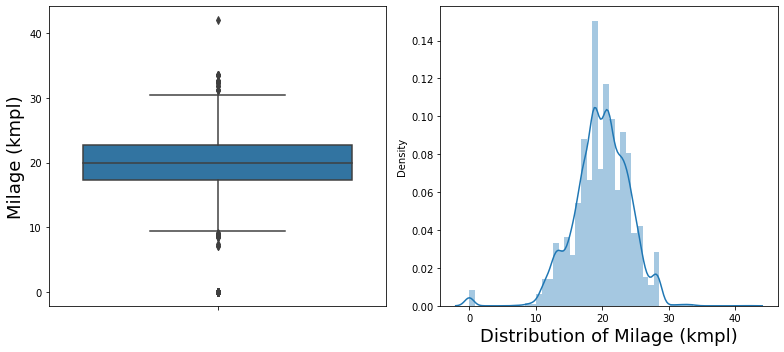

In [233]:
plt.figure(figsize = (11,5))
plt.subplot(1,2,1)
sns.boxplot(y='Milage(kmpl)', data= df)
plt.ylabel('Milage (kmpl)',fontsize= 18)
plt.subplot(1,2,2)
sns.distplot(df['Milage(kmpl)'])
plt.xlabel('Distribution of Milage (kmpl)',fontsize= 18)
plt.tight_layout()
plt.show()

In [234]:
print("Mean of Milage(kmpl):",df['Milage(kmpl)'].mean(),'kmpl')
print("Median of Milage(kmpl):",df['Milage(kmpl)'].median(),'kmpl')

Mean of Milage(kmpl): 19.82472965345972 kmpl
Median of Milage(kmpl): 20.0 kmpl


In [235]:
df['Milage(kmpl)'].fillna(df['Milage(kmpl)'].mean(), inplace =True)

###### 2. Imputation of missing values in Max Power

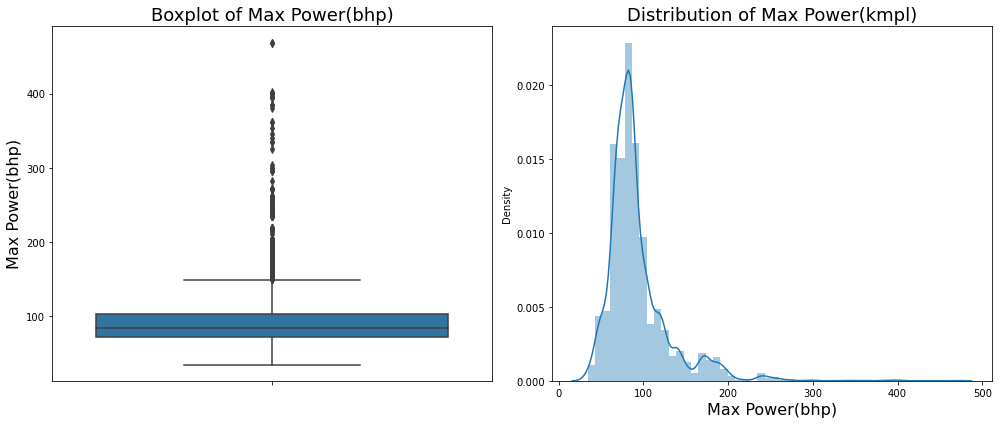

In [236]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y = df['Max Power(bhp)'])
plt.title('Boxplot of Max Power(bhp)',fontsize = 18)
plt.ylabel('Max Power(bhp)', fontsize = 16 )
plt.subplot(1,2,2)
sns.distplot( x = df['Max Power(bhp)'])
plt.title('Distribution of Max Power(kmpl)', fontsize = 18)
plt.xlabel('Max Power(bhp)', fontsize = 16)
plt.tight_layout()
plt.show()

In [237]:
print("Mean of Max Power:",df['Max Power(bhp)'].mean(),'bhp')
print("Median of Max Power:",df['Max Power(bhp)'].median(),'bhp')

Mean of Max Power: 92.73147233314377 bhp
Median of Max Power: 83.1 bhp


1. Distribution of Max Power is right Skewed and from boxplot we can see presence of outliers.

2. Mean is greater than median.

In [238]:
df['Max Power(bhp)'].fillna(df['Max Power(bhp)'].median(), inplace = True)

###### 3. Imputation of missing values in Torque

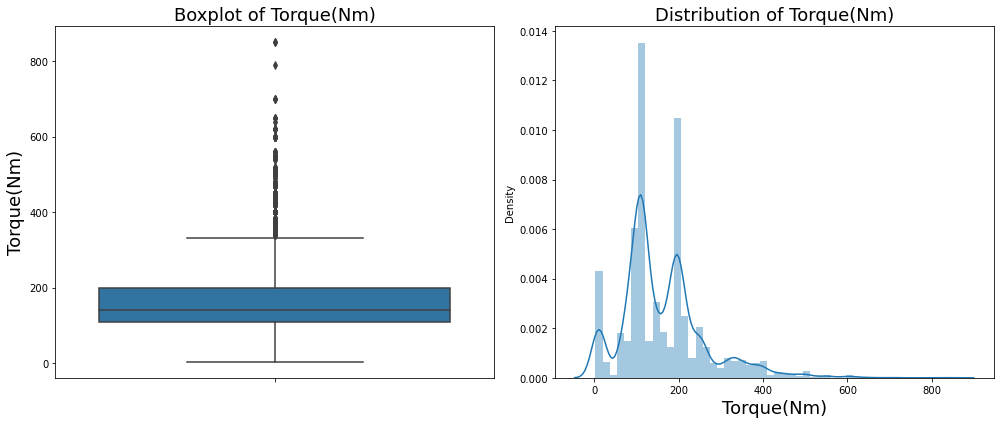

In [240]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y = df['Torque(Nm)'])
plt.title('Boxplot of Torque(Nm)', fontsize = 18)
plt.ylabel('Torque(Nm)', fontsize = 18 )
plt.subplot(1,2,2)
sns.distplot( x = df['Torque(Nm)'] )
plt.title('Distribution of Torque(Nm)', fontsize = 18)
plt.xlabel('Torque(Nm)', fontsize = 18)
plt.tight_layout()
plt.show()

In [241]:
print("Mean of Torque(Nm):",df['Torque(Nm)'].mean(),'Nm')
print("Median of Torque(Nm):",df['Torque(Nm)'].median(),'Nm')

Mean of Torque(Nm): 162.3707607825189 Nm
Median of Torque(Nm): 140.0 Nm


1. Outliers are present in upper bound of Torque(Nm)

2. Torque is right skewed in nature.

In [242]:
df['Torque(Nm)'].fillna(df['Torque(Nm)'].median(), inplace =True)

###### 4. Imputation of missing values in Length(mm)

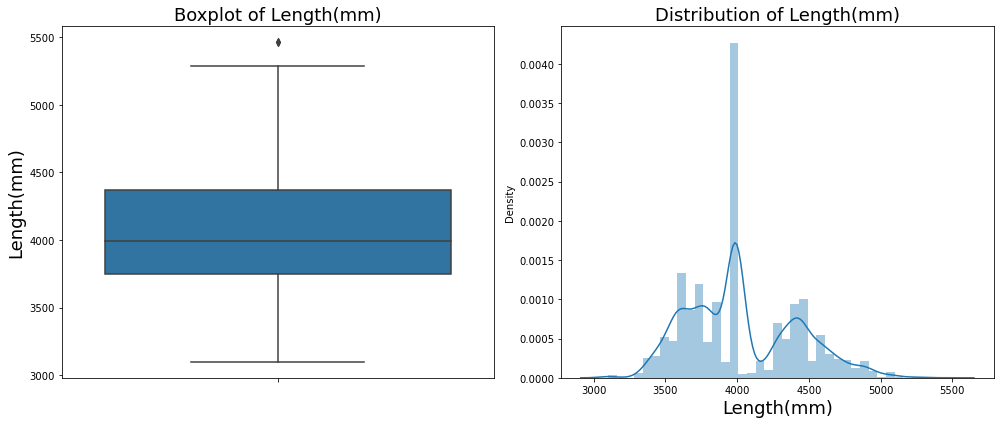

In [243]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y = df['Length(mm)'])
plt.title('Boxplot of Length(mm)',fontsize = 18)
plt.ylabel('Length(mm)', fontsize = 18 )
plt.subplot(1,2,2)
sns.distplot( x = df['Length(mm)'] )
plt.title('Distribution of Length(mm)',fontsize = 18)
plt.xlabel('Length(mm)',fontsize = 18)
plt.tight_layout()
plt.show()

In [244]:
print("Mean of Length(mm):",df['Length(mm)'].mean(),'mm')
print("Median of Length(mm):",df['Length(mm)'].median(),'mm')

Mean of Length(mm): 4028.7541905855337 mm
Median of Length(mm): 3995.0 mm


In [245]:
df['Length(mm)'].fillna(df['Length(mm)'].mean(), inplace = True)

##### 5. Imputation of missing values in Width(mm)

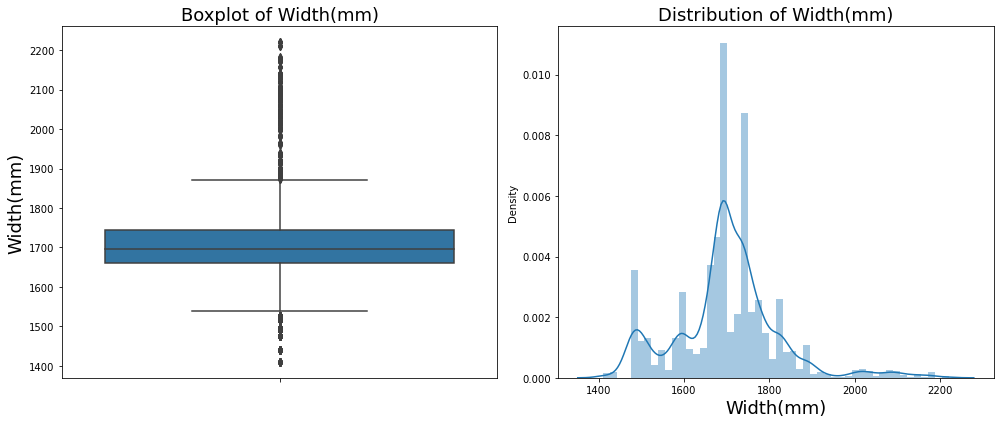

In [246]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y = df['Width(mm)'])
plt.title('Boxplot of Width(mm)', fontsize = 18)
plt.ylabel('Width(mm)', fontsize = 18 )
plt.subplot(1,2,2)
sns.distplot( x = df['Width(mm)'] )
plt.title('Distribution of Width(mm)', fontsize = 18)
plt.xlabel('Width(mm)', fontsize = 18)
plt.tight_layout()
plt.show()

In [247]:
print("Mean of Width(mm):",df['Width(mm)'].mean(),'mm')
print("Median of Width(mm):",df['Width(mm)'].median(),'mm')

Mean of Width(mm): 1701.6738207276483 mm
Median of Width(mm): 1695.0 mm


In [248]:
df['Width(mm)'].fillna(df['Width(mm)'].mean(), inplace = True)

#### 6. Imputation of missing values in Height (mm)

In [249]:
df.drop(df[df['Height(mm)']>5000].index, inplace =True)

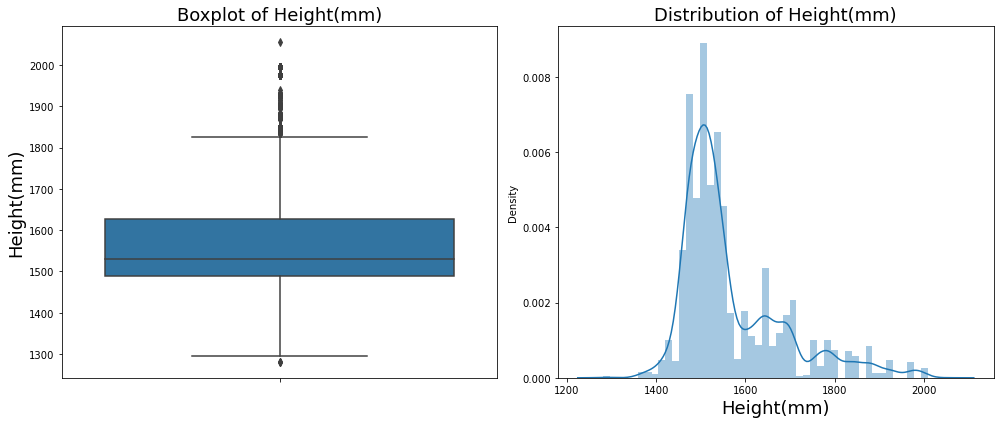

In [250]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(y = df['Height(mm)'])
plt.title('Boxplot of Height(mm)', fontsize = 18)
plt.ylabel('Height(mm)', fontsize = 18 )
plt.subplot(1,2,2)
sns.distplot( x = df['Height(mm)'])
plt.title('Distribution of Height(mm)', fontsize = 18)
plt.xlabel('Height(mm)', fontsize = 18)
plt.tight_layout()
plt.show()

In [251]:
print("Mean of Height(mm):",df['Height(mm)'].mean(),'mm')
print("Median of Height(mm):",df['Height(mm)'].median(),'mm')

Mean of Height(mm): 1567.6982323232323 mm
Median of Height(mm): 1530.0 mm


In [252]:
df['Height(mm)'].fillna(df['Height(mm)'].median(),inplace=True)

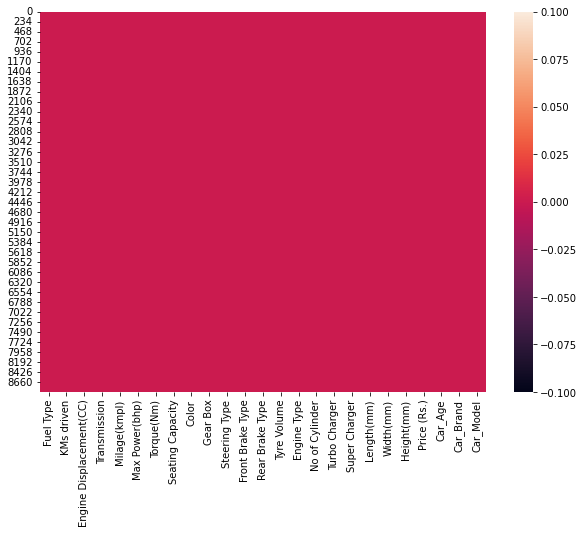

In [253]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull())
plt.show()

### Statistical Matrix

In [254]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
KMs driven,8884.0,66460.392954,48663.642255,201.0,37000.0,61873.0,88522.0000,2070500.0
Engine Displacement(CC),8884.0,1391.822490,467.384613,0.0,1197.0,1248.0,1498.0000,5935.0
Milage(kmpl),8884.0,19.823632,4.197076,0.0,17.4,20.0,22.7025,42.0
Max Power(bhp),8884.0,92.599130,37.438784,34.2,73.0,83.1,100.6000,469.0
Torque(Nm),8884.0,161.997166,99.817097,3.0,109.0,140.0,200.0000,850.0
Seating Capacity,8884.0,5.231427,0.734645,0.0,5.0,5.0,5.0000,10.0
No of Cylinder,8884.0,3.792098,0.511602,0.0,4.0,4.0,4.0000,8.0
Length(mm),8884.0,4028.761789,381.821466,3099.0,3746.0,3995.0,4331.0000,5462.0
Width(mm),8884.0,1701.675323,120.047417,1410.0,1660.0,1695.0,1745.0000,2220.0
Height(mm),8884.0,1566.968370,115.762687,1281.0,1490.0,1530.0,1620.0000,2055.0


All Numerical value except Milage(kmpl) have value of mean greater than median.

If we look at minimum value column, clearly there exist error in columns like Engine Displacement(CC), Milage(kmpl), Seating Capacity, No of Cylinder as there minimum value cannot be zero.

Some of Columns contain outliers as seen by comparison of 75% column & max column.

Average Used car price is 6.34 lakh while maximum price is 95 lakh.

In [255]:
df.describe(include=object)

,Fuel Type,Transmission,Color,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Tyre Volume,Engine Type,Turbo Charger,Super Charger,Car_Brand,Car_Model
count,8884,8884,8884,8884,8884,8884,8884,8884,8884,8884,8884,8884,8884
unique,5,2,198,26,5,13,17,5,338,3,2,225,1759
top,Petrol,Manual,White,5 Speed,Power,Disc,Drum,Tubeless Radial Tyre,In-Line Engine,No,No,Maruti Swift,Unknown
freq,4793,7455,3802,6972,8061,5098,7729,7320,1211,5306,8872,956,1660


Most of car used Tubeless radial tyre compare to ran-flat tyre which are costly compare to earlier.

Majority of car are 5 seater with 5 speed gearbox having power steering facility. We can conclude that most of used car low price range small car and there are very few SUV category car.

Most prefer color is white with mannual transmission.

Very few car contain Super Charger while majority of do not contain Turbo charger.

# Exploratory Data Analysis

###### Fuel Type

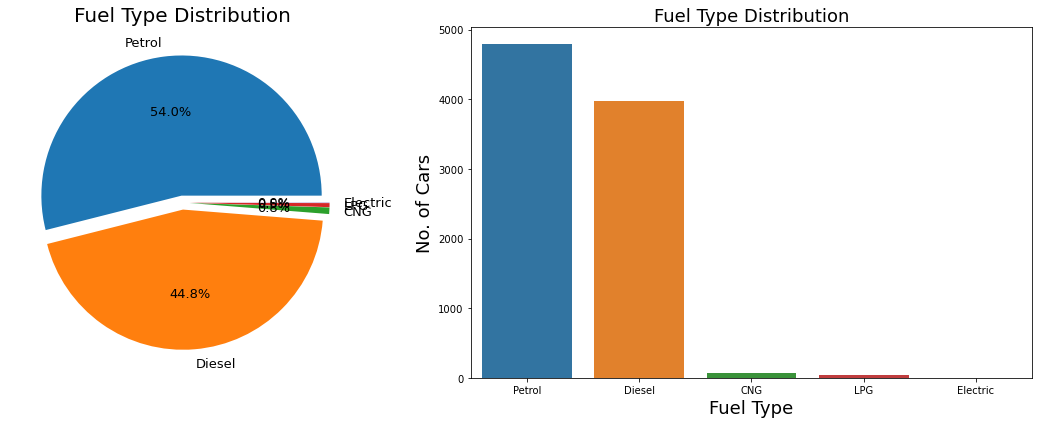

In [256]:
# Counting Fuel type
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,6))
df['Fuel Type'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],autopct='%2.1f%%',textprops ={ 'fontsize':13}, ax=ax[0])
ax[0].set_title('Fuel Type Distribution', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('Fuel Type',data=df,ax=ax[1])
ax[1].set_title('Fuel Type Distribution',fontsize=18)
ax[1].set_xlabel("Fuel Type",fontsize=18)
ax[1].set_ylabel("No. of Cars",fontsize=18)
plt.tight_layout()
plt.show()

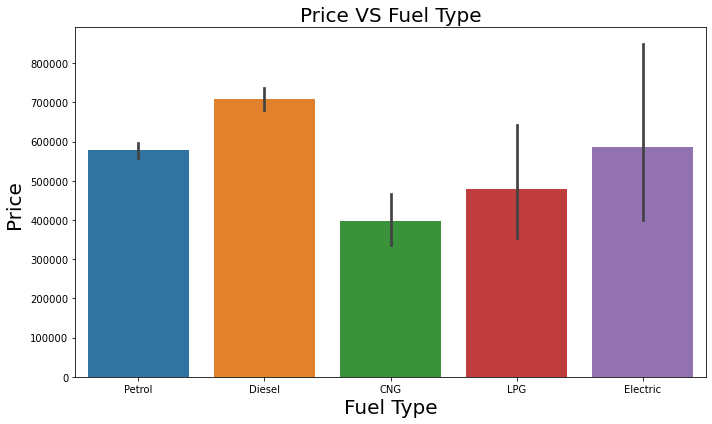

In [257]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize =(10,6))
sns.barplot(y=df['Price (Rs.)'],x=df['Fuel Type'])
plt.title("Price VS Fuel Type",fontsize=20)
plt.xlabel('Fuel Type',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()

Most of car are Petrol operated followed by Diesel. This may be due to low prices of Petrol car compare to diesel car.

Very small segment of electric car and also price is quite high compare to petrol based.

CNG based car are Cheapest compare to others.

###### Steering Type

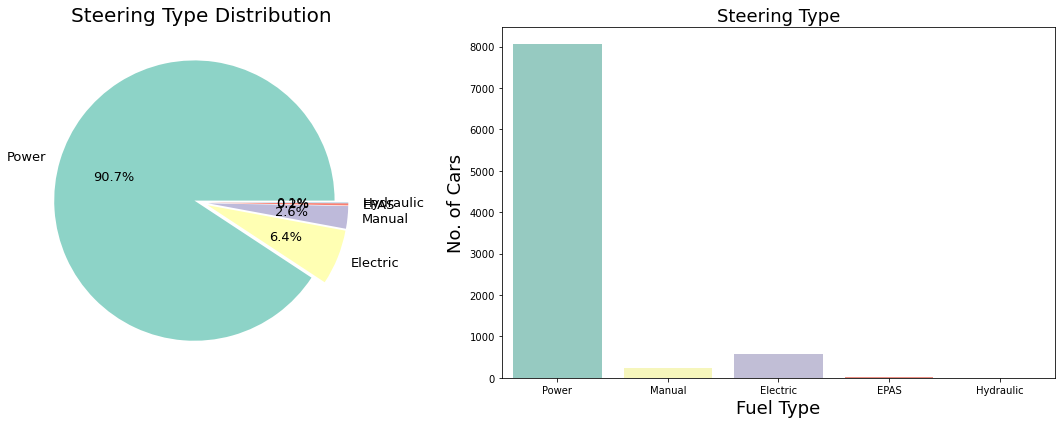

In [265]:
# Counting Steering Type
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,6))
df['Steering Type'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],autopct='%2.1f%%',textprops ={ 'fontsize':13}, ax=ax[0])
ax[0].set_title('Steering Type Distribution', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('Steering Type',data=df,ax=ax[1])
ax[1].set_title("Steering Type",fontsize=18)
ax[1].set_xlabel("Fuel Type",fontsize=18)
ax[1].set_ylabel("No. of Cars",fontsize=18)
plt.tight_layout()
plt.show()

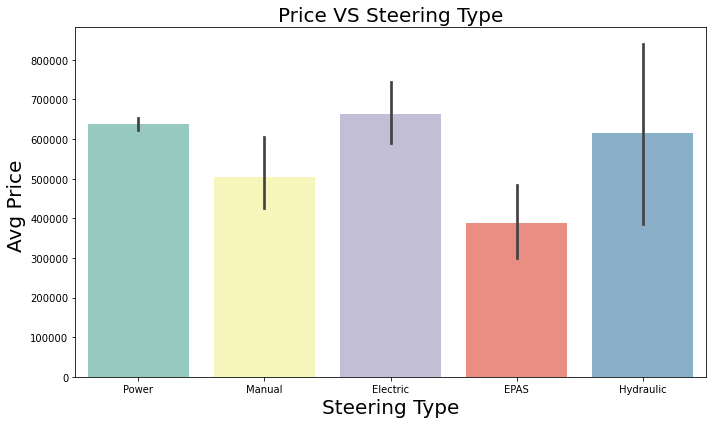

In [266]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize =(10,6))
sns.barplot(y=df['Price (Rs.)'],x=df['Steering Type'])
plt.title("Price VS Steering Type",fontsize=20)
plt.xlabel('Steering Type',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

More than 90 % of car users perfer Power steering compare to others.

6.2% car based on electric steering, which is costly compare to others.

Very small section of car still uses Manual Steering, Most probably they belong to old model.

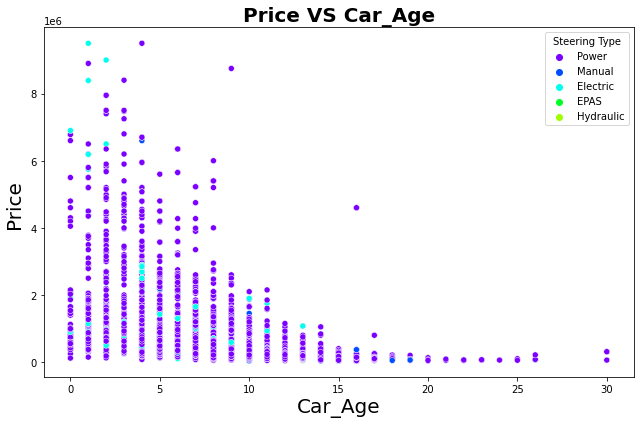

In [267]:
# ploting Car age Vs Price based on steering types.
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_rainbow_r')
plt.figure(figsize =(9,6))
sns.scatterplot(y=df['Price (Rs.)'],x=df['Car_Age'], hue =df['Steering Type'])
plt.title("Price VS Car_Age",fontsize=20,fontweight ='bold')
plt.xlabel('Car_Age',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

###### Turbo Charger

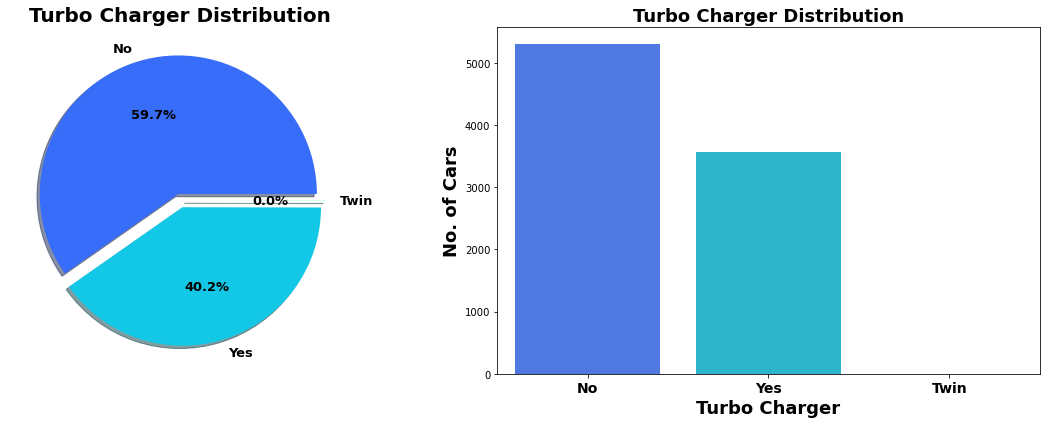

In [271]:
# Exploring Turbo Charger
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['Turbo Charger'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Turbo Charger Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Turbo Charger',data=df,ax=ax[1])
ax[1].set_title('Turbo Charger Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Turbo Charger",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

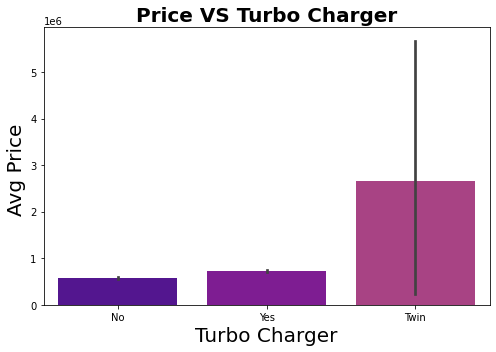

In [272]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
plt.figure(figsize =(7,5))
sns.barplot(y=df['Price (Rs.)'],x=df['Turbo Charger'])
plt.title("Price VS Turbo Charger",fontsize=20,fontweight ='bold')
plt.xlabel('Turbo Charger',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

40% cars are with turbo charger & almost less than 1 % car with twin facility.

As expected Max price for car based on Twin engine followed by with turbocharger.

###### Transmission

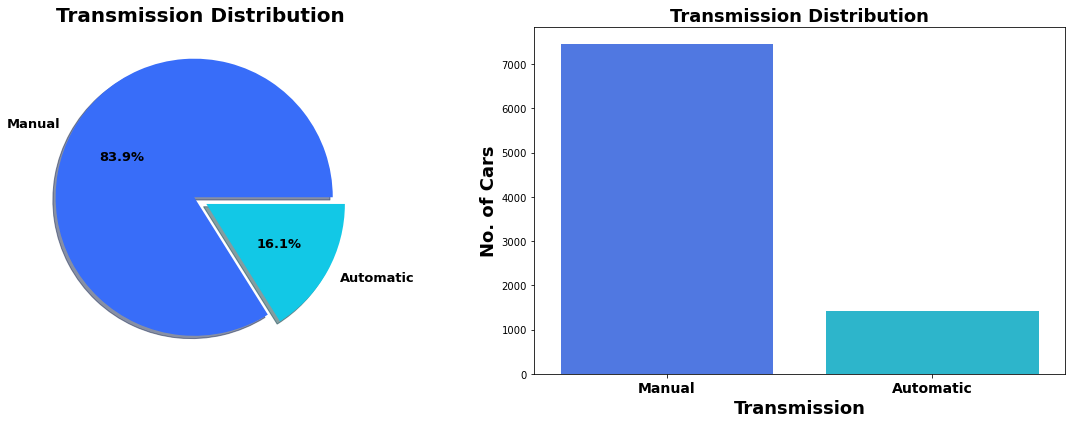

In [275]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['Transmission'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%2.1f%%',
                             textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Transmission Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Transmission',data=df,ax=ax[1])
ax[1].set_title('Transmission Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Transmission",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

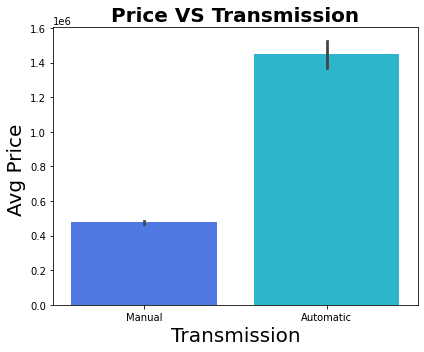

In [276]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize =(6,5))
sns.barplot(y=df['Price (Rs.)'],x=df['Transmission'])
plt.title("Price VS Transmission",fontsize=20,fontweight ='bold')
plt.xlabel('Transmission',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

###### Price Vs No of Cylinder

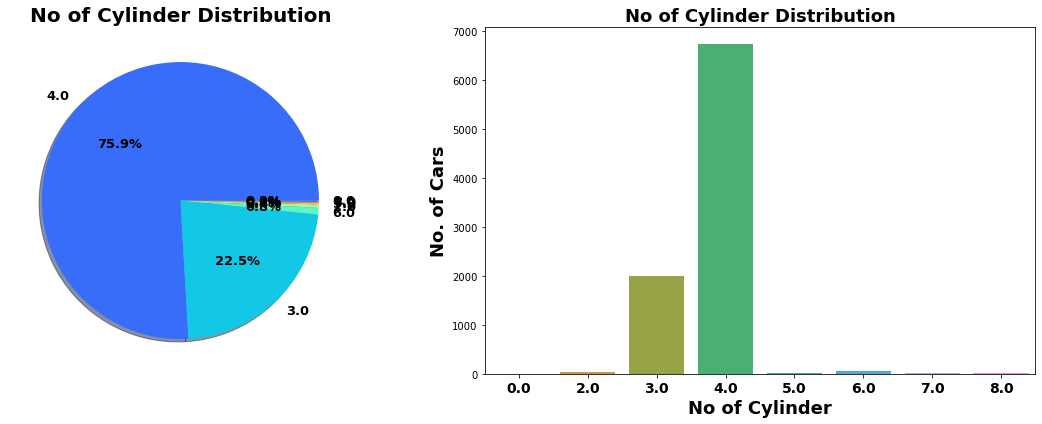

In [277]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,6))
df['No of Cylinder'].value_counts().plot.pie(autopct='%2.1f%%',
                             textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No of Cylinder Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('No of Cylinder',data=df,ax=ax[1])
ax[1].set_title('No of Cylinder Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("No of Cylinder",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Cars",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

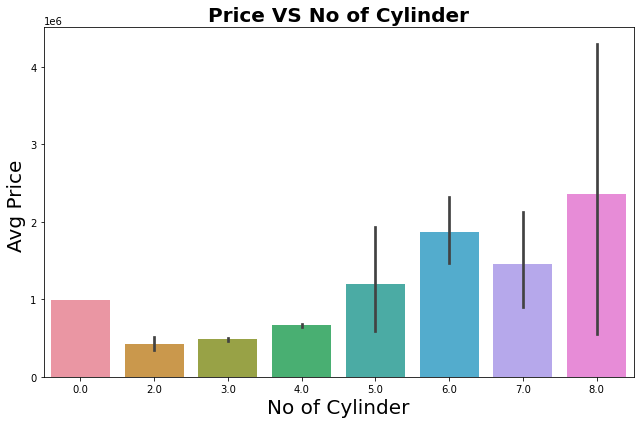

In [278]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize =(9,6))
sns.barplot(y=df['Price (Rs.)'],x=df['No of Cylinder'])
plt.title("Price VS No of Cylinder",fontsize=20,fontweight ='bold')
plt.xlabel('No of Cylinder',fontsize = 20)
plt.ylabel('Avg Price ',fontsize = 20)
plt.tight_layout()

###### Car Age Vs Avgerage Price

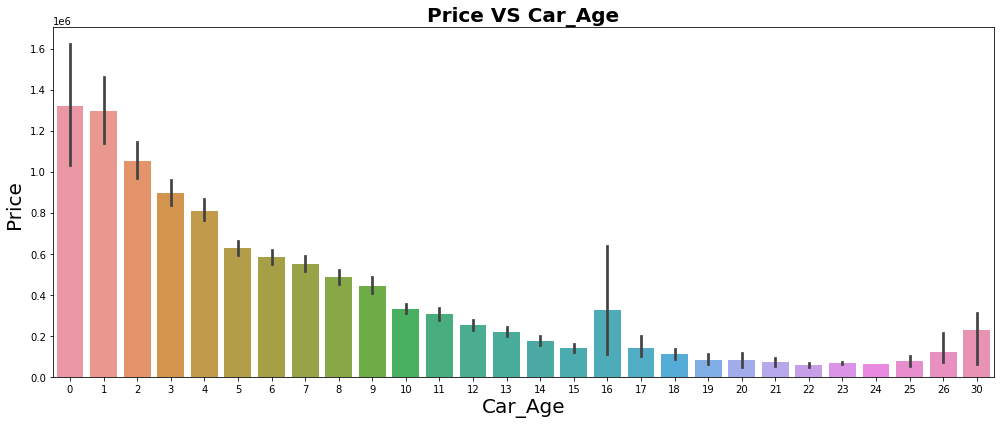

In [279]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize =(14,6))
sns.barplot(y=df['Price (Rs.)'],x=df['Car_Age'])
plt.title("Price VS Car_Age",fontsize=20,fontweight ='bold')
plt.xlabel('Car_Age',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()

As car get older, price of car depricates.

###### brakes vs price

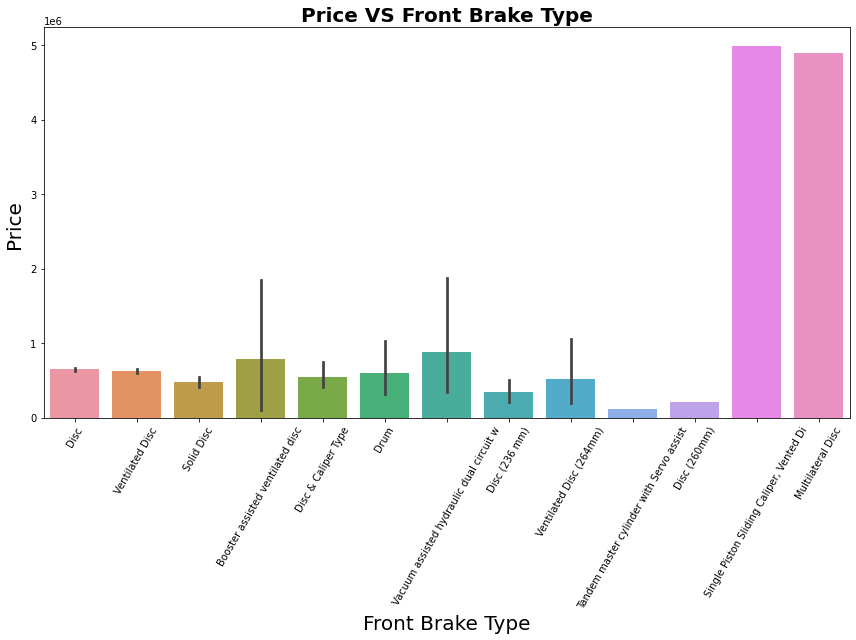

In [280]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize =(12,9))
sns.barplot(y=df['Price (Rs.)'],x=df['Front Brake Type'])
plt.title("Price VS Front Brake Type",fontsize=20,fontweight ='bold')
plt.xlabel('Front Brake Type',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

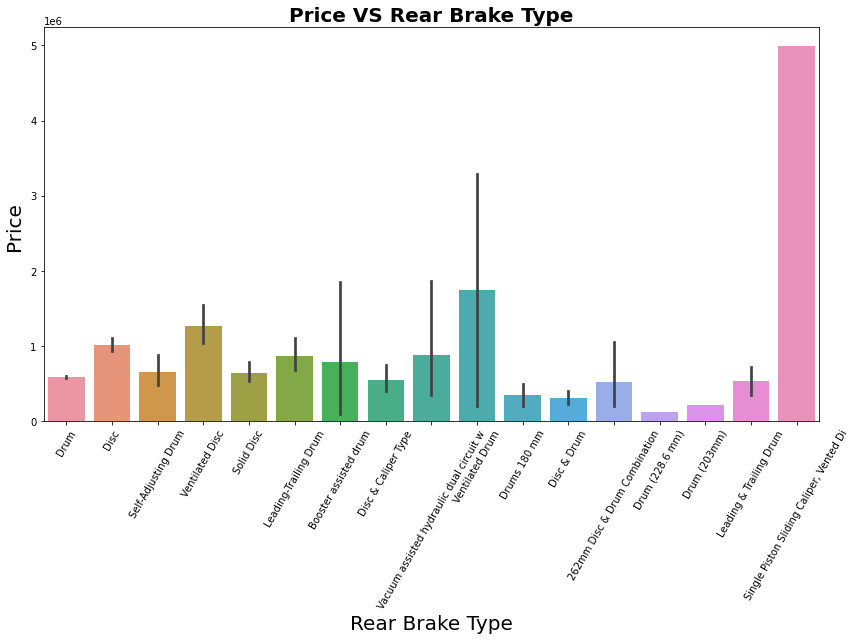

In [281]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize =(12,9))
sns.barplot(y=df['Price (Rs.)'],x=df['Rear Brake Type'])
plt.title("Price VS Rear Brake Type",fontsize=20,fontweight ='bold')
plt.xlabel('Rear Brake Type',fontsize = 20)
plt.xticks(rotation=60)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

###### Price VS Milage

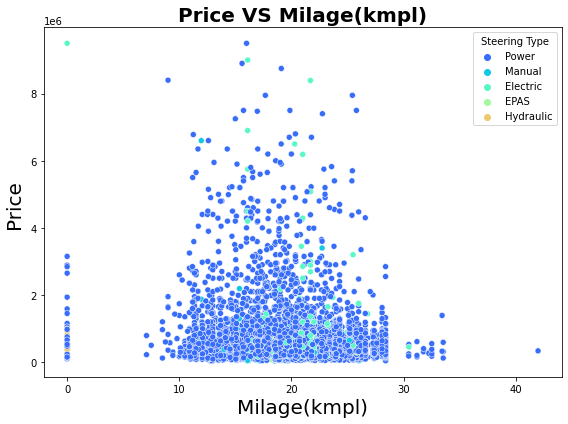

In [282]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize =(8,6))
sns.scatterplot(y=df['Price (Rs.)'],x=df['Milage(kmpl)'],hue =df['Steering Type'])
plt.title("Price VS Milage(kmpl)",fontsize=20,fontweight ='bold')
plt.xlabel('Milage(kmpl)',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

Milage (kmpl) varies in between 10 to 25 kmpl for most of cars. For Majority cars price is below 0.5e6. We didn't get any other significant relation between price and steering types.

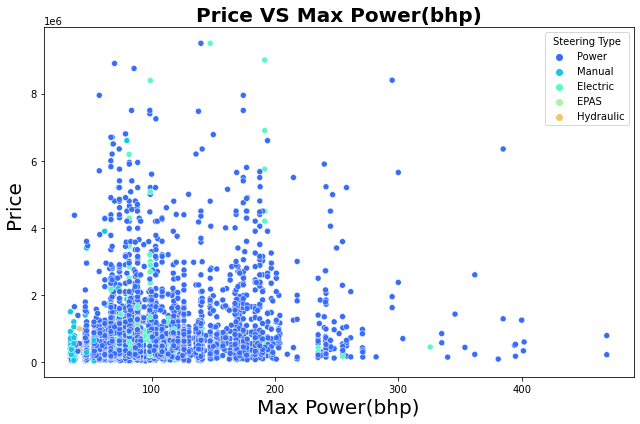

In [283]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize =(9,6))
sns.scatterplot(y=df['Price (Rs.)'],x=df['Max Power(bhp)'], hue =df['Steering Type'])
plt.title("Price VS Max Power(bhp)",fontsize=20,fontweight ='bold')
plt.xlabel('Max Power(bhp)',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

Majority of cars have max power below 200 bhp.

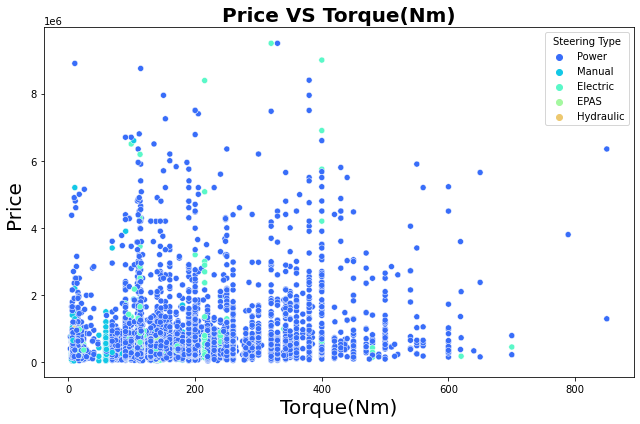

In [284]:
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize =(9,6))
sns.scatterplot(y=df['Price (Rs.)'],x=df['Torque(Nm)'], hue =df['Steering Type'])
plt.title("Price VS Torque(Nm)",fontsize=20,fontweight ='bold')
plt.xlabel('Torque(Nm)',fontsize = 20)
plt.ylabel('Price ',fontsize = 20)
plt.tight_layout()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Disc'),
  Text(1, 0, 'Ventilated Disc'),
  Text(2, 0, 'Solid Disc'),
  Text(3, 0, 'Booster assisted ventilated disc'),
  Text(4, 0, 'Disc & Caliper Type'),
  Text(5, 0, 'Drum'),
  Text(6, 0, 'Vacuum assisted hydraulic dual circuit w'),
  Text(7, 0, 'Disc (236 mm)'),
  Text(8, 0, 'Ventilated Disc (264mm)'),
  Text(9, 0, 'Tandem master cylinder with Servo assist'),
  Text(10, 0, 'Disc (260mm)'),
  Text(11, 0, 'Single Piston Sliding Caliper, Vented Di'),
  Text(12, 0, 'Multilateral Disc')])

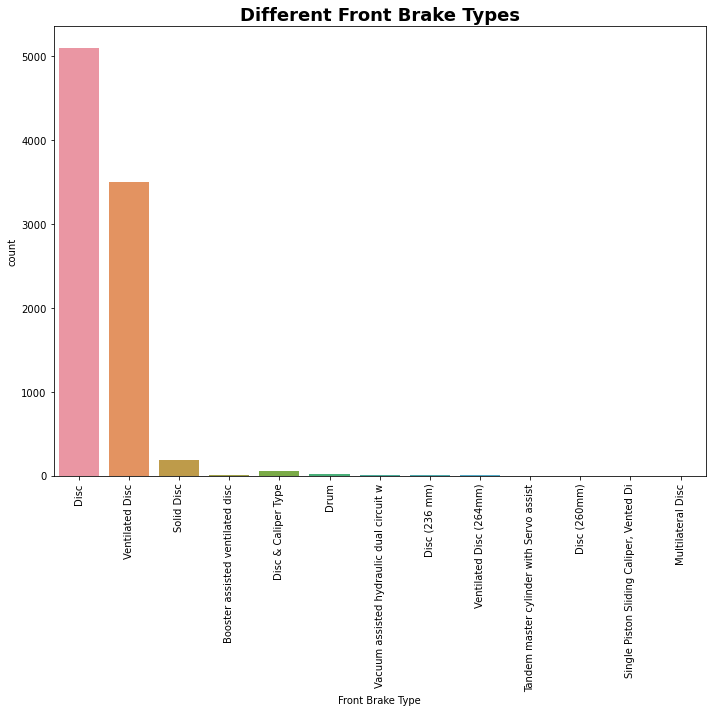

In [286]:
#Count plot for front_brake_type column
plt.figure(figsize=[10,10])
sns.countplot(df['Front Brake Type'])
plt.title('Different Front Brake Types',fontsize=18,fontweight ='bold')
plt.xticks(rotation=90 )

Most of car used Disc brakes 

# Feature Engineering

In [287]:
# Spliting data in Numeric and categorical Variable.
Numerical = ['KMs driven', 'Engine Displacement(CC)', 'Car_Age','Milage(kmpl)', 'Max Power(bhp)', 'Torque(Nm)',
             'Seating Capacity', 'No of Cylinder', 'Length(mm)', 'Width(mm)', 'Height(mm)', 'Price (Rs.)' ]

Categorical = ['Fuel Type', 'Transmission', 'Color', 'Gear Box', 'Steering Type', 'Front Brake Type', 
               'Rear Brake Type', 'Tyre Volume', 'Turbo Charger', 'Super Charger']

In [288]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i] = le.fit_transform(df[i])
df.head()

,Fuel Type,KMs driven,Engine Displacement(CC),Transmission,Milage(kmpl),Max Power(bhp),Torque(Nm),Seating Capacity,Color,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Tyre Volume,Engine Type,No of Cylinder,Turbo Charger,Super Charger,Length(mm),Width(mm),Height(mm),Price (Rs.),Car_Age,Car_Brand,Car_Model
0,4,18600,1497,1,17.40,117.3,145.0,5.0,185,2,4,1,5,3,i VTEC Engine,4.0,0,0,4440.0,1695.0,1495.0,675000.0,7,Honda City,i VTEC SV
1,1,15000,1956,1,17.10,170.0,350.0,5.0,185,4,4,1,2,3,2.0-Litre 4-Cyl Multijet,4.0,2,0,4395.0,1818.0,1640.0,1750000.0,4,Jeep Compass,2.0 Limited Option
2,1,115000,2499,1,14.80,80.0,19.0,7.0,185,2,3,11,5,3,In-Line Engine,4.0,2,0,4435.0,1680.0,1765.0,175000.0,13,Chevrolet Tavera,B2-7 seats BSIII
3,4,80000,1497,1,16.80,116.4,146.0,5.0,185,2,4,1,5,3,SOHC i-VTEC,4.0,0,0,4440.0,1695.0,1485.0,350000.0,13,Honda City,S
4,4,35000,1197,1,20.36,78.9,111.8,5.0,185,2,4,11,5,3,DOHC Kappa2 Engine,4.0,0,0,3585.0,1595.0,1550.0,300000.0,9,Hyundai i10,Sportz Option


In [289]:
df['Engine Type'] = le.fit_transform(df['Engine Type'])

In [290]:
df['Car_Brand'] = le.fit_transform(df['Car_Brand'])
df['Car_Model'] = le.fit_transform(df['Car_Model'])

In [291]:
df.head()

,Fuel Type,KMs driven,Engine Displacement(CC),Transmission,Milage(kmpl),Max Power(bhp),Torque(Nm),Seating Capacity,Color,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Tyre Volume,Engine Type,No of Cylinder,Turbo Charger,Super Charger,Length(mm),Width(mm),Height(mm),Price (Rs.),Car_Age,Car_Brand,Car_Model
0,4,18600,1497,1,17.40,117.3,145.0,5.0,185,2,4,1,5,3,307,4.0,0,0,4440.0,1695.0,1495.0,675000.0,7,59,1696
1,1,15000,1956,1,17.10,170.0,350.0,5.0,185,4,4,1,2,3,68,4.0,2,0,4395.0,1818.0,1640.0,1750000.0,4,87,355
2,1,115000,2499,1,14.80,80.0,19.0,7.0,185,2,3,11,5,3,169,4.0,2,0,4435.0,1680.0,1765.0,175000.0,13,29,712
3,4,80000,1497,1,16.80,116.4,146.0,5.0,185,2,4,1,5,3,234,4.0,0,0,4440.0,1695.0,1485.0,350000.0,13,59,1326
4,4,35000,1197,1,20.36,78.9,111.8,5.0,185,2,4,11,5,3,130,4.0,0,0,3585.0,1595.0,1550.0,300000.0,9,78,1437


#### Outliers

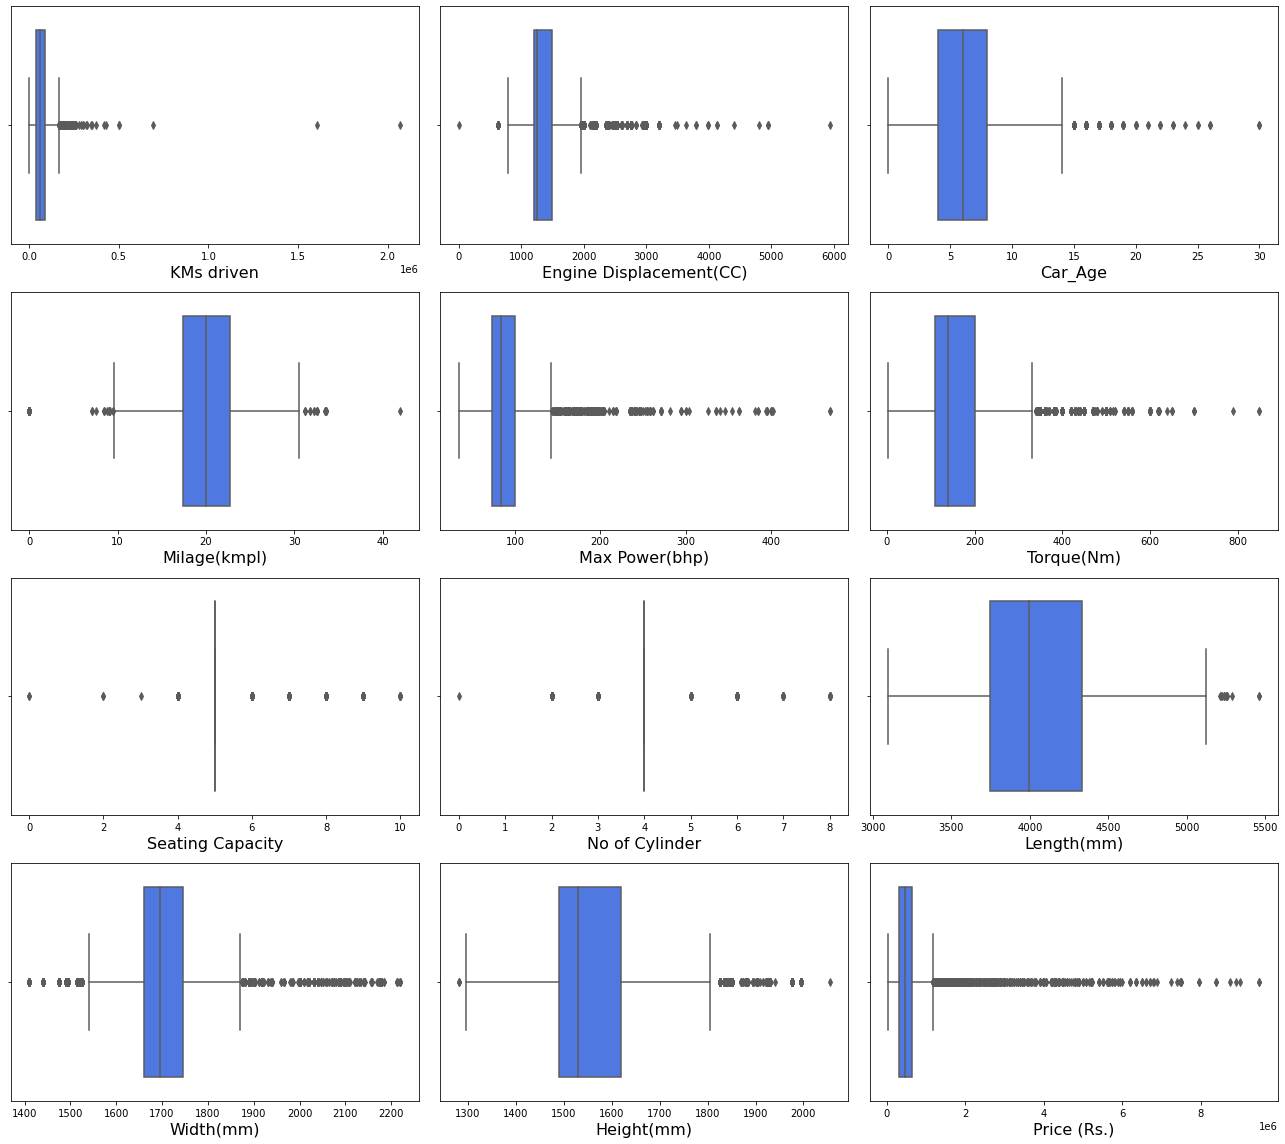

In [293]:
plt.figure(figsize=(18,16))
plt_num = 1
for i in Numerical:
    if plt_num <= 12:
        ax = plt.subplot(4,3,plt_num)
        sns.boxplot(df[i])
        plt.xlabel(i, fontsize= 16)
    plt_num += 1
plt.show()

Data is realstic and data is error-free, we will build model with data we already have without removing outliers. Outliers are realstic data.

#### Correlation

In [294]:
df.corr()

,Fuel Type,KMs driven,Engine Displacement(CC),Transmission,Milage(kmpl),Max Power(bhp),Torque(Nm),Seating Capacity,Color,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Tyre Volume,Engine Type,No of Cylinder,Turbo Charger,Super Charger,Length(mm),Width(mm),Height(mm),Price (Rs.),Car_Age,Car_Brand,Car_Model
Fuel Type,1.000000,-0.096669,-0.103263,0.036299,-0.119378,-0.255754,-0.570999,-0.257936,-0.088287,-0.130252,-0.127891,-0.053774,-0.000013,-0.054525,0.015317,-0.049173,-0.705556,-0.021321,-0.384157,-0.391022,-0.275566,-0.079260,-0.026821,-0.013892,0.067776
KMs driven,-0.096669,1.000000,0.077127,0.089567,-0.044611,0.009638,0.025004,0.050685,0.059157,-0.011783,0.046533,0.035885,0.022178,0.035672,0.008317,0.029526,0.044174,0.007300,0.029410,0.003664,0.022279,-0.165029,0.421579,0.073370,-0.099206
Engine Displacement(CC),-0.103263,0.077127,1.000000,-0.197157,-0.125241,0.169724,0.153158,0.071639,0.007224,0.093908,0.030232,-0.009279,0.019866,0.050597,0.001771,0.453062,0.107254,0.012034,0.128330,0.105600,0.054442,0.310738,0.054418,-0.009376,-0.095602
Transmission,0.036299,0.089567,-0.197157,1.000000,0.121133,-0.231979,-0.178822,-0.000538,0.063239,-0.206549,0.000909,0.011637,-0.028710,-0.041162,-0.002874,-0.094681,-0.078553,-0.008924,-0.115205,-0.129999,-0.016392,-0.462612,0.120936,0.039043,0.050768
Milage(kmpl),-0.119378,-0.044611,-0.125241,0.121133,1.000000,-0.479573,-0.218453,-0.370555,-0.014775,-0.230442,-0.030694,0.045736,-0.088282,-0.110698,-0.069008,-0.069725,0.047614,-0.047316,-0.374392,-0.281511,-0.276793,-0.114927,-0.077048,0.010856,0.089835
Max Power(bhp),-0.255754,0.009638,0.169724,-0.231979,-0.479573,1.000000,0.788804,0.186852,-0.081254,0.578889,0.047527,-0.050114,0.070916,0.052936,0.080080,0.109990,0.360693,0.039714,0.678239,0.654269,0.199255,0.215779,0.006523,-0.035675,-0.062735
Torque(Nm),-0.570999,0.025004,0.153158,-0.178822,-0.218453,0.788804,1.000000,0.234504,-0.012004,0.479504,0.109479,-0.028931,0.042986,0.039759,0.040884,0.096793,0.600632,0.001819,0.598572,0.634957,0.258921,0.194929,-0.000916,-0.027910,-0.055160
Seating Capacity,-0.257936,0.050685,0.071639,-0.000538,-0.370555,0.186852,0.234504,1.000000,0.075401,-0.028265,0.042068,-0.021823,0.035456,0.110958,0.035805,0.002230,0.246500,0.005102,0.292159,0.199129,0.568780,0.019204,0.029269,0.020888,-0.059448
Color,-0.088287,0.059157,0.007224,0.063239,-0.014775,-0.081254,-0.012004,0.075401,1.000000,-0.090995,0.025510,0.023632,-0.026815,-0.022146,0.012895,-0.032831,0.032220,-0.010854,-0.023168,-0.032637,0.064325,-0.042016,0.057440,-0.006745,-0.054478
Gear Box,-0.130252,-0.011783,0.093908,-0.206549,-0.230442,0.578889,0.479504,-0.028265,-0.090995,1.000000,-0.014463,-0.093354,0.012933,0.035209,0.058432,0.053034,0.222979,0.047226,0.364284,0.433289,-0.009835,0.190531,-0.016274,-0.049688,-0.036438


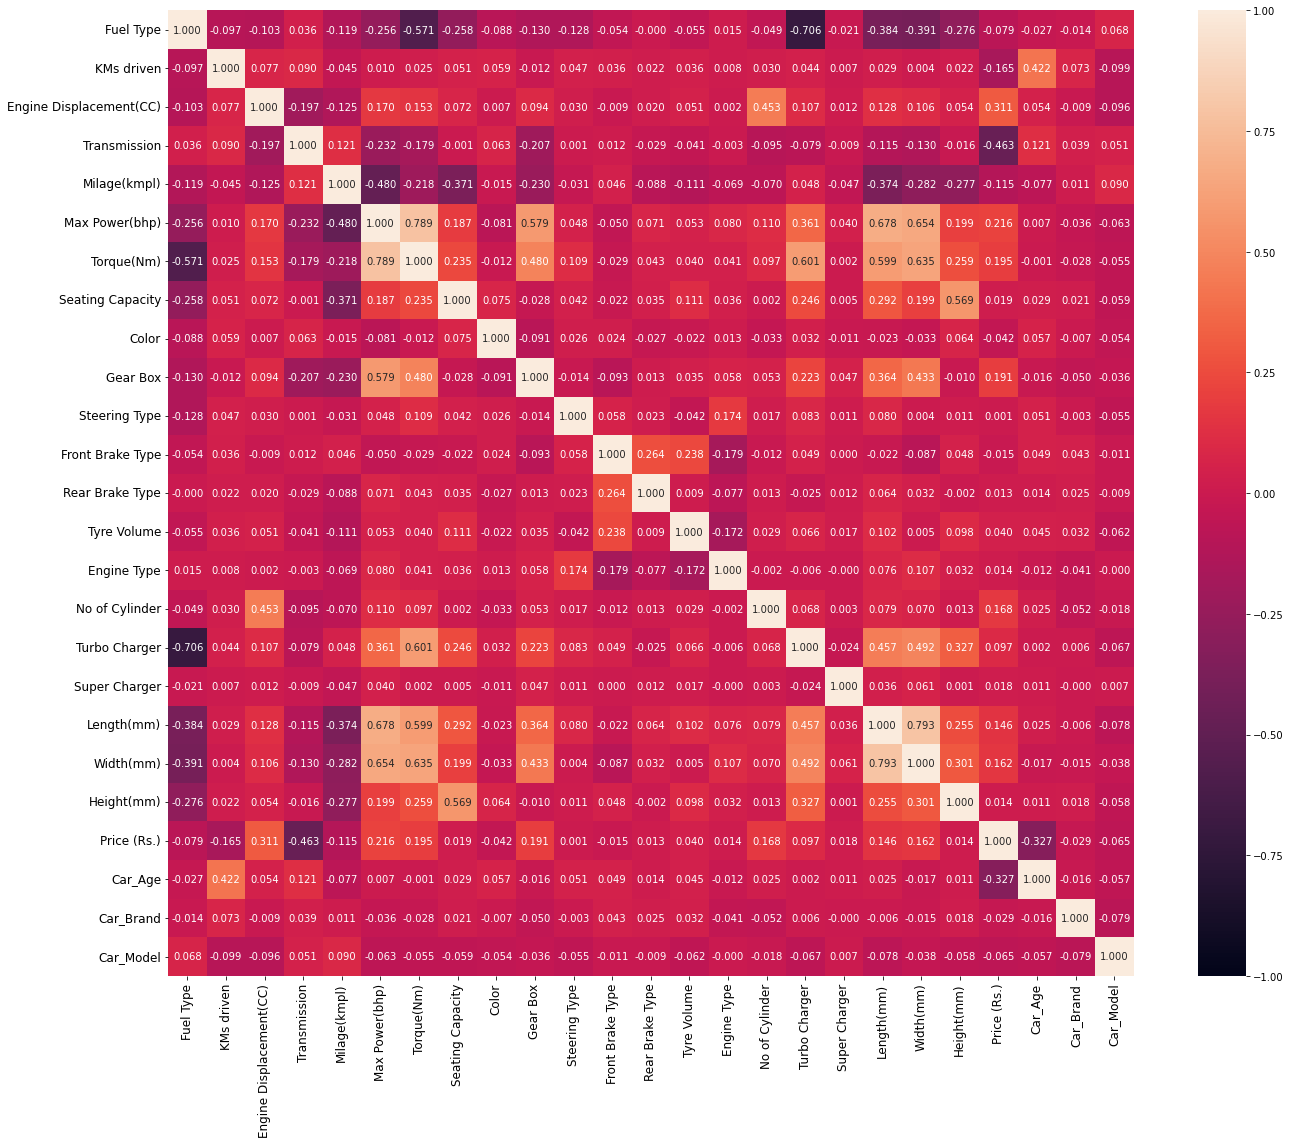

In [295]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

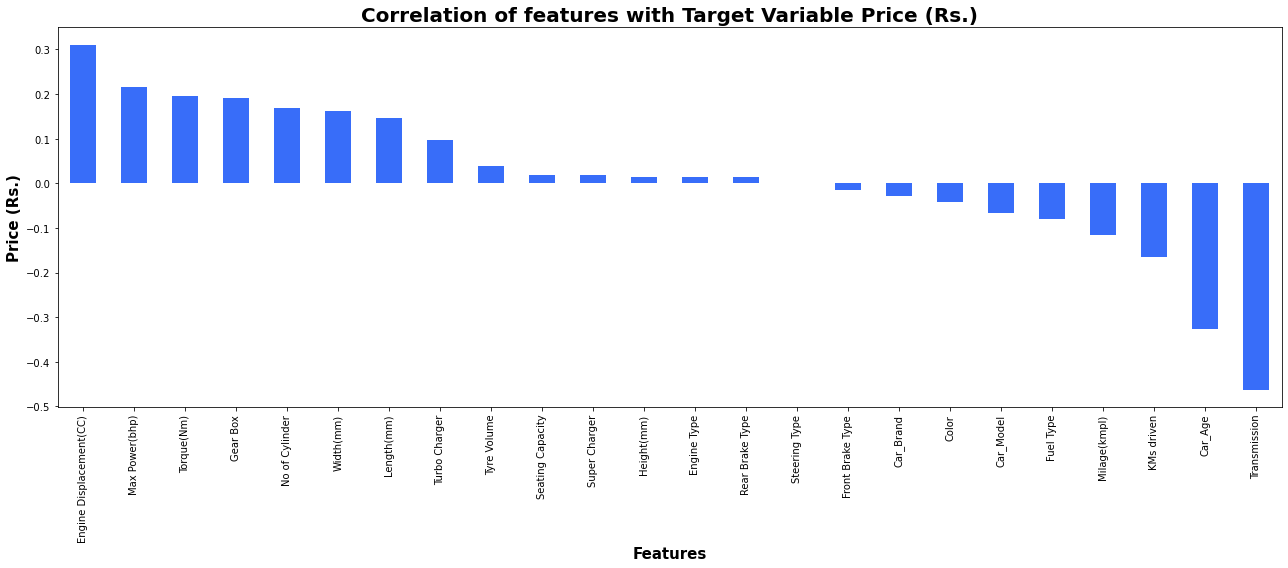

In [296]:
plt.figure(figsize = (18,8))
df.corr()['Price (Rs.)'].drop(['Price (Rs.)']).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price (Rs.)',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price (Rs.)',fontsize = 20,fontweight='bold')
plt.show()

Maximum correlation observe in Length & Width followed by torque & max power.

Most of features are moderately & poorly correlated with each other.

Steering type very very poorly correlated with each other.

#### Standard Scaling

In [298]:
# Splitting data in target and dependent feature
X = df.drop(['Price (Rs.)'], axis =1)
Y = df['Price (Rs.)']

In [299]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

#### Multicollinearity

In [300]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,2.594710,Fuel Type
1,1.254566,KMs driven
2,1.341156,Engine Displacement(CC)
3,1.130920,Transmission
4,1.915827,Milage(kmpl)
5,5.280568,Max Power(bhp)
6,4.834661,Torque(Nm)
7,1.782765,Seating Capacity
8,1.045554,Color
9,1.643363,Gear Box


# Model Building

In [313]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

In [303]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6218, 24)
Training target vector size: (6218,)
Test feature matrix size: (2666, 24)
Test target vector size: (2666,)


#### Random State

In [306]:
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.3)
    mod = RandomForestRegressor()
    mod.fit(X_train, Y_train)
    pred = mod.predict(X_test)
    acc=r2_score(Y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.781868961121505  on Random_state  52


In [316]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=52, test_size=.2)

##### Random Forest Regressor

In [317]:
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(Y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

# Cross Validation Score
scores = cross_val_score(RFR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 78.84376114476599
mean_squared_error: 108914244056.0833
mean_absolute_error: 142084.60197711497
root_mean_squared_error: 330021.5811974776

Cross validation score : 57.12655258661263

R2_Score - Cross Validation Score : 21.71720855815336


##### XGBRegressor

In [318]:
XGB=XGBRegressor()
XGB.fit(X_train,Y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(Y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

# Cross Validation on XGB Model
scores = cross_val_score(XGB, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 85.70263386925507
mean_squared_error: 73604142720.19276
mean_absolute_error: 120818.41830068233
root_mean_squared_error: 271300.83435218694

Cross validation score : 69.99678963054534

R2_Score - Cross Validation Score : 15.70584423870973


#### Gradient Boosting Regressor

In [320]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,Y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(Y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))

# Cross Validation on Gradient Boosting
scores = cross_val_score(GBR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 74.27591900399247
mean_squared_error: 132429911332.01727
mean_absolute_error: 176969.22631321248
root_mean_squared_error: 363909.2075394868

Cross validation score : 60.85257600192355

R2_Score - Cross Validation Score : 13.423343002068918


#### Decision Tree Regressor

In [321]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(Y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(Y_test,pred)))
# Cross Validation Score
scores = cross_val_score(DTR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 54.20127236379708
mean_squared_error: 235776020178.24817
mean_absolute_error: 182982.39786156444
root_mean_squared_error: 485567.7297537885

Cross validation score : 19.636757355284402

R2_Score - Cross Validation Score : 34.56451500851268


###### On Basis of difference between R2 Score and Cross Validation Score XGBRegressor is selected as best model with 85.70% r2_score.

# Hyper Parameter Tunning

In [322]:
from sklearn.model_selection import GridSearchCV

In [323]:
parameter = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

In [330]:
GCV=GridSearchCV(XGBRegressor(),parameter,cv=5,n_jobs = -1)

In [331]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    val

In [332]:
GCV.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [333]:
Final_mod=XGBRegressor(colsample_bytree = 0.7,
 learning_rate = 0.1,
 max_depth = 5,
 min_child_weight = 1,
 n_estimators = 500,
 objective = 'reg:squarederror',
 subsample = 0.7)
Final_mod.fit(X_train,Y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(Y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(Y_test, pred)))

R2_Score: 87.61357120438944
mean_squared_error: 63766463314.18555
mean_absolute_error: 118907.88022958286
RMSE value: 252520.22357463877


##### Final Model is giving us R2 Score of 87.61% which is slightly improved compare to earlier R2 score of 85.70%.

# Saving the model

In [334]:
import joblib
joblib.dump(Final_mod,"Old_Car_Price.pkl")

['Old_Car_Price.pkl']

# Predictions

In [336]:
model=joblib.load("Old_Car_Price.pkl")
prediction = model.predict(X_test)
prediction

array([955666.8 , 244809.11, 241022.23, ..., 495490.3 , 237588.94,
       632464.25], dtype=float32)

In [338]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021